# Notebook: Application à l'étude d'une TurboVoile
**Marc BUFFAT, département mécanique, UCB Lyon 1**

<img src="turbo-voile.jpg" width="500px">



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Analyse et paramètres du problème

 - $U_0$ vitesse relative du vent d'angle $\beta$
 - $V_b$ vitesse du bateau
 - $R$ rayon du cylindre
 - $H$ hauteur du cylindre
 - $\omega$ vitesse de rotation
 - $C_f$ coefficient de traînée du bateau ,$S_m$ surface mouillée
 - $\rho_0$ masse volumique de l'air et $\rho$ masse volumique de l'eau
 - $Fp$ force de portance
 - $Ft$ force de traînée

 

In [2]:
# parametres du problème
Cf, U0, R, H, omega, rho0, rho, L = sp.symbols('C_f U_0 R H omega rho_0 rho L',positive=True)

## Modèle fluide parfait: solution  analytique

- cylindre rayon R et de longueur L
- solution potentiel

### Solution potentiel autour cylindre

- solution sans rotation

 $$ \psi_1 = U_0 r \sin\theta - U_0\frac{R^2\sin\theta}{r}$$
 
- vortex de circulation $\Gamma$

 $$ \psi_2 = \frac{\Gamma}{2\pi} \ln r $$
 
solution de l'équation de Laplace 

$$\Delta \psi = 0$$

Le champ de vitesse est obtenu par

$$ U_r = \frac{1}{r} \frac{\partial \Psi}{\partial \theta} \mbox{ et }
    U_\theta =  -\frac{\partial \Psi}{\partial r} $$  
    
 et 
 
 $$ U_x = U_r \cos\theta - U_\theta \sin \theta \mbox{ et } U_y = U_r \sin\theta + U_\theta \cos \theta$$

Détermination de la relation entre l'angle du point d'arrêt et la circulation.

In [3]:
# calcul de la circulation en fct de omega
Gamma = 2*sp.pi*R*omega*R
display("Circulation Gamma",Gamma)

'Circulation Gamma'

2*pi*R**2*omega

In [4]:
r,theta = sp.symbols('r theta')
psi1 = U0*r*sp.sin(theta) - U0*R**2*sp.sin(theta)/r
psi2 = Gamma/(2*sp.pi)*sp.log(r)
display("psi = ",psi1+psi2)

'psi = '

-R**2*U_0*sin(theta)/r + R**2*omega*log(r) + U_0*r*sin(theta)

In [5]:
Ut1 = -psi1.diff(r).subs(r,R)
Ut2 = -psi2.diff(r).subs(r,R)
Ut = Ut1 + Ut2
display("cdt arret Ut=0 soit ",Ut,"=0")

'cdt arret Ut=0 soit '

-R*omega - 2*U_0*sin(theta)

'=0'

In [6]:
# condition au pt d'arret -> theta en fct de omega
display("Ut=",Ut)
Theta=sp.solve(Ut,theta)[1]
display(sp.Eq(theta,Theta))

'Ut='

-R*omega - 2*U_0*sin(theta)

Eq(theta, -asin(R*omega/(2*U_0)))

- Condition au pt d'arrêt sur le cylindre:   $\theta$ < 20 degré (analogie profil d'aile) 
- d'où la vitesse de rotation max du cylindre avec $\sin\theta \approx \theta$

In [7]:
# w_max
theta_m = sp.symbols('theta_m')
omega_m = theta_m*2*U0/R
display("omega max:",omega_m)

'omega max:'

2*U_0*theta_m/R

### Force de portance

la force de portance pour un cylindre de rayon R et de longueur L est avec ce modèle proportionnelle à la circulation de vitesse $\Gamma$

L'analyse dimensionnelle donne

In [8]:
Fp = rho0*U0*Gamma*L
display("Force de portance ",Fp)

'Force de portance '

2*pi*L*R**2*U_0*omega*rho_0

## Analyse du calcul comsol

- simulation pour différentes valeurs de $\theta_1$
- calcul répartition de pression autour du cylindre
- analyse des résultats

![polaire](polaire.png)

- calcul portance

![portance](portance.png)

- calcul circulation

d'où la loi $F_p = F(\Gamma)$

- calcul de la vitesse de rotation $ \omega$

$$\Gamma = 2 \pi R \omega R$$

## Bilan des forces

![turbo_voile](turbo_voile.png)

Calcul dans le référentiel du bateau  
 - $U_r$ = vitesse du vent / bateau (correspond à $U_0$)
 - $V_b$ = vitesse absolue du bateau
 - $V $ = vitesse absolue du vent d'angle $\alpha$ / $V_b$
 - $\beta$ = angle d'incidente de U0 dans le repère lié au bateau

 
 Pour les forces :
 
 1. la force de portance = fonction de Ur et $\beta$
 2. la force de trainée  = fonction de Vb
 
 Analyse dimensionnelle

 - force de portance
 $$ F_p = F_p(\rho,\omega,U_0,R,H)$$
 
 - force de traînée (surface mouillée du bateau)
 $$ F_t = F_t(\rho,C_f,V_b,S_m)$$

In [9]:
# Force de portance
Fp = rho0*U0*Gamma*H
display("Portance: Fp=",Fp)

'Portance: Fp='

2*pi*H*R**2*U_0*omega*rho_0

In [10]:
# alpha:angle du vent, V vitesse vent, Vb vitesse bateaux 
Cf, alpha = sp.symbols('C_f alpha')
V, Vb = sp.symbols('V V_b')

In [11]:
# angle beta de la vitesse relative
beta = sp.atan2(V*sp.sin(alpha),V*sp.cos(alpha)+Vb)
display("Angle du vent: beta =",beta)

'Angle du vent: beta ='

atan2(V*sin(alpha), V*cos(alpha) + V_b)

In [12]:
# module vitesse relative
Ur = sp.sqrt((V*sp.sin(alpha))**2+(V*sp.cos(alpha)+Vb)**2)
display("Vitesse relative du vent: Ur =",Ur)

'Vitesse relative du vent: Ur ='

sqrt(V**2*sin(alpha)**2 + (V*cos(alpha) + V_b)**2)

In [13]:
display("Angle de la force de portance:",sp.cos(sp.pi/2-beta))

'Angle de la force de portance:'

V*sin(alpha)/sqrt(V**2*sin(alpha)**2 + (V*cos(alpha) + V_b)**2)

In [14]:
# d'où la force motrice
Fm = sp.cos(sp.pi/2-beta)*Fp.subs({U0:Ur})
display("Force motrice Fm=",Fm)

'Force motrice Fm='

2*pi*H*R**2*V*omega*rho_0*sin(alpha)

In [15]:
# force de trainee fonction de la surface mouillée S
S = sp.symbols('S')
Ft = rho*Cf*Vb**2*S/2
display("Force de trainée: Ft=",Ft)

'Force de trainée: Ft='

C_f*S*V_b**2*rho/2

## Equilibre des forces pour un nbre de cylindres Nc

On suppose que le bateau n'a pas d'autre moyens de propulsion que la turbovoile

1. Bilan des forces => portance + trainée = 0

2. Calcul de la surface mouillée S du bateau (pour la trainée)

3. Loi de  la vitesse V en fonction de omega

In [16]:
# cas avec Nc cylindres
Nc = sp.symbols('N_c')
eq1 = sp.Eq(Nc*Fm,Ft)
display("Equilibre du bateau ",eq1)

'Equilibre du bateau '

Eq(2*pi*H*N_c*R**2*V*omega*rho_0*sin(alpha), C_f*S*V_b**2*rho/2)

In [17]:
# taille du bateau L longeur , La largueur, h tirant d'eau
L, La, h = sp.symbols('L L_a h')
Sm = L*sp.sqrt(La**2+4*h**2)
# surface mouillée
display("Surface mouillée ",Sm)
eq3 = eq1.subs({S:Sm})
# equilibre => Vb en fonction de omega
display("Equilibre du bateau:",eq3)


'Surface mouillée '

L*sqrt(L_a**2 + 4*h**2)

'Equilibre du bateau:'

Eq(2*pi*H*N_c*R**2*V*omega*rho_0*sin(alpha), C_f*L*V_b**2*rho*sqrt(L_a**2 + 4*h**2)/2)

## Application numérique

- conteneur Enercon L=130 m x La=22.5 m  avec h~5 m tirant d'eau 
- vent V=30 nds (x 1.85 km/h) de travers ($\alpha = \pi/2$)
- Nc=4 cylindres
- hauteur cylindre H = 2*h
- diametre La/5
- ordre de grandeur trainee CF=0.00133
- $\theta_m$=20 degrés

In [18]:
# parametres
vals = { theta_m:20*np.pi/180, Nc:4, V:30*1.85*1000/3600, H:2*h, R:La/10, Cf:0.00133, alpha:sp.pi/2 , L:130, La:22.5, h:5, 
         rho0:1, rho:1000, sp.pi:np.pi }
# vitesse de rotation en tr/min
N = sp.symbols("N")
# rotation max
Wmax = omega_m.subs(vals).subs({U0:Ur,Vb:0}).subs(vals)
print('omega_max=',Wmax,' N_max=',Wmax*60/(2*np.pi)," tr/min")
# vitesse bateau fct de omega
eq4=eq3.subs(vals).subs(vals).subs(omega,N*2*sp.pi/60)
display("Equation d'équilibre ",eq4)
# vitesse bateau en nds
VB=sp.solve(eq4,Vb)[1]*3600/1000/1.85
display("Vitesse du bateau en nds",sp.Eq(Vb,VB))

omega_max= 4.78349498694742  N_max= 45.6790123456790  tr/min


"Equation d'équilibre "

Eq(653.843971028376*pi*N, 2128.58439241318*V_b**2)

'Vitesse du bateau en nds'

Eq(V_b, 1.91160137298645*sqrt(N))

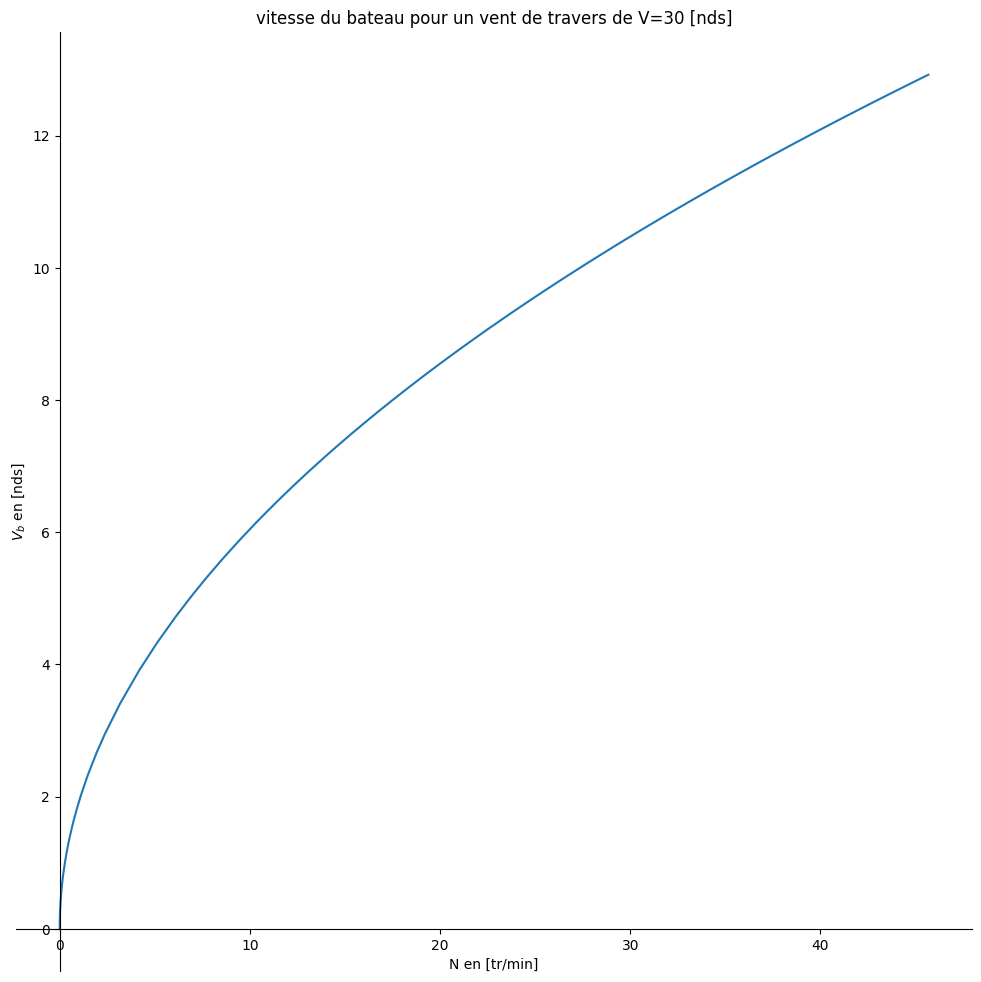

In [19]:
plt.rcParams['figure.figsize'] = 10, 10
sp.plot(VB,(N,0,Wmax*60/(2*np.pi)),title="vitesse du bateau pour un vent de travers de V=30 [nds]",
        xlabel="N en [tr/min]",ylabel="$V_b$ en [nds]",lw=4);


## Analyse paramétrique

On calcule la taille de la turbovoile en fonction de la taille du bateau L variant de 80 a 200m

In [20]:
N = 5
LL = np.linspace(80,200,N)
for i in range(N):
    # parametres
    vals = { theta_m:20*np.pi/180, Nc:1, V:60*1.85*1000/3600, H:2*h, R:La/10, Cf:0.00133, alpha:sp.pi/2 , 
            La:22.5*LL[i]/130, h:5*LL[i]/130, L:LL[i], rho0:1, rho:1000, sp.pi:np.pi }
    # rotation max
    Wmax = omega_m.subs(vals).subs({U0:Ur,Vb:0}).subs(vals)
    # vitesse bateau fct de omega
    eq4=eq3.subs(vals).subs(vals).subs({omega:Wmax})
    # vitesse bateau en nds
    VB=sp.solve(eq4,Vb)[1]*3600/1000/1.85
    #
    val = []
    for p in [L,La,h,R]:
        val.append(p.subs(vals).subs(vals))
    # 
    print("L={:.1f}\t turbovoile  La={:.1f} h={:.1f} R={:.1f} wmax={:.1f} \t vitesse Vb={:.1f} [nds]".
          format(val[0],val[1],val[2],val[3],Wmax,VB))

L=80.0	 turbovoile  La=13.8 h=3.1 R=1.4 wmax=15.5 	 vitesse Vb=12.9 [nds]
L=110.0	 turbovoile  La=19.0 h=4.2 R=1.9 wmax=11.3 	 vitesse Vb=12.9 [nds]
L=140.0	 turbovoile  La=24.2 h=5.4 R=2.4 wmax=8.9 	 vitesse Vb=12.9 [nds]
L=170.0	 turbovoile  La=29.4 h=6.5 R=2.9 wmax=7.3 	 vitesse Vb=12.9 [nds]
L=200.0	 turbovoile  La=34.6 h=7.7 R=3.5 wmax=6.2 	 vitesse Vb=12.9 [nds]


## The END